# Netflix: Exploratory Data Analysis 

In this notebook we perform some exploratory data analysis to answer Netflix related questions. Netflix is one of the leading streaming platforms in the world, with a diverse catalog encompassing movies and series for different audiences. Data visualization will be highly used to give insights of the data. The dataset is available on [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

## Dataset Cleaning

We first import some useful modules for the datavisualization and analysis

In [153]:
import pandas as pd               # data cleaning and analysis
import matplotlib.pyplot as plt   # visualization
import seaborn as sns             # visualization
import numpy as np
import plotly.express as px


Let's start by getting some information of the dataset

In [154]:
df = pd.read_csv('netflix_titles.csv')  # reading the csv file
df.info()                               # getting info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


As we can see there are some missing data from the dataset, e.g. `director` or `cast`. Let's get an idea of the percentage of missing data. 

In [155]:
100*(df.isna().sum()/len(df)).to_frame(name="percentage missing data").round(4)


,percentage missing data
show_id,0.00
type,0.00
title,0.00
director,29.91
cast,9.37
country,9.44
date_added,0.11
release_year,0.00
rating,0.05
duration,0.03


Most of the data missing concerns the attribute `director` (roughly 30%), `cast` and `country` (roughly 9.5%). We will not use `director` (or `cast`) information during our analysis, hence we can leave it as it is, and do not erase the empty rows. This is done to preserve the integrity of the dataset, and to not miss any valuable information. We will use `country` information, but we will keep (for same reason as above) empty rows.

Notice that, before proceding in the visualization, the date should be changed. In particular, we want to add some columns to know when a movie is added (month, year).

In [156]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['month_added'] = df['date_added'].dt.month
df['month_name_added'] = df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year


Great, now also date is okay! Let's start with some visualizations.

## Visualizations

We will striclty focus on answering three questions:

* Question 1
* Question 2
* Question 3

Notice that where possible, we will use Netflix colorscheme palette and font type. Nice tip from this [website](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization).

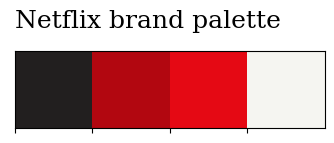

In [157]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])  # palette

plt.title("Netflix brand palette ", loc='left',
          fontfamily='serif', fontsize=18, y=1.2)
plt.show()
 

### Questions

1. Which thems are more appealing for netflix users? And in what format? (bar plot)
2. What are the most themes for each country production? (grafico con connessioni)
3. small multiples paesi con time

### Viz

In [158]:
# Generate the dataset

df['genre'] = df['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))
Types = []
for i in df['genre']:
    Types += i
    
unique_genres = list(set(Types))
# create new df
tmp = pd.DataFrame(unique_genres)
tmp.columns = ["genres"]
tmp["genres"] = tmp["genres"].apply(
    lambda x:  x.replace('TV Shows', '').replace(' TV Shows', '').replace(' TV Shows ', '').replace('TV Shows ', '').replace(' TV', '').replace(' TV ', '').replace('TV ', ''))
tmp["genres"] = tmp["genres"].apply(
    lambda x:  x.replace(' Movies', '').replace(
        ' Movies ', '').replace('Movies ', '').replace('Movies', '').replace(' Series', '').replace(
        ' Series ', '').replace('Series ', ''))
tmp["genres"] = tmp["genres"].apply(lambda x:  x.replace(' ', ''))
unique_genres = tmp.dropna()["genres"].unique()[1:]
genres_df = pd.DataFrame(unique_genres)
genres_df.columns = ["genres"]
empty = np.zeros(len(genres_df))
genres_df["movies"] = empty
genres_df["tv"] = empty
df['genre_split'] = df['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').replace(' ', ',').split(','))


def contains_word(s, w):
    a = (' ' + w) in (' ' + s)
    return a


for tidx, type_ in enumerate(genres_df['genres']):
    movies = 0
    tv = 0
    for idx, i in enumerate(df['genre_split']):
        for word in i:
            if word == 'Docuseries':
                word = 'Documentaries'
            if word == "Kids'":
                word = 'Children&Family'
            if word == 'Thrillers':
                word = 'Crime'

            if contains_word(type_, word):
                if df["type"][idx] == 'Movie':
                    movies += 1
                else:
                    tv += 1

    genres_df["movies"][tidx] = movies
    genres_df["tv"][tidx] = tv

genres_df['tot_count'] = genres_df['movies']+genres_df['tv']
genres_df['percentage_movies'] = (
    genres_df['movies'] / genres_df['tot_count']) 
genres_df['percentage_tv'] = (genres_df['tv'] / genres_df['tot_count'])
genres_df = genres_df.sort_values('tot_count', ascending=False).dropna()
tmp



/var/folders/25/y8b04v6n71sb72wqqdqbkr300000gn/T/ipykernel_3894/158690912.py:53: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/25/y8b04v6n71sb72wqqdqbkr300000gn/T/ipykernel_3894/158690912.py:54: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,genres
0,Spanish-Language
1,Classic&Cult
2,Dramas
3,Anime
4,Stand-UpComedy&TalkShows
5,Sci-Fi&Fantasy
6,Mysteries
7,Music&Musicals
8,Dramas
9,Horror


In [159]:
df = genres_df[:8]
data_q2q3_ratio = pd.DataFrame(df['genres'])
data_q2q3_ratio.columns = ["type"]
data_q2q3_ratio["Movie"] = df['percentage_movies']
data_q2q3_ratio["TV Show"] = df['percentage_tv']


In [160]:
data_q2q3_ratio = data_q2q3_ratio.sort_values("Movie", ascending=True)
data_q2q3_ratio = data_q2q3_ratio.set_index('type')


/var/folders/25/y8b04v6n71sb72wqqdqbkr300000gn/T/ipykernel_3894/2959863481.py:11: UserWarning:

FixedFormatter should only be used together with FixedLocator



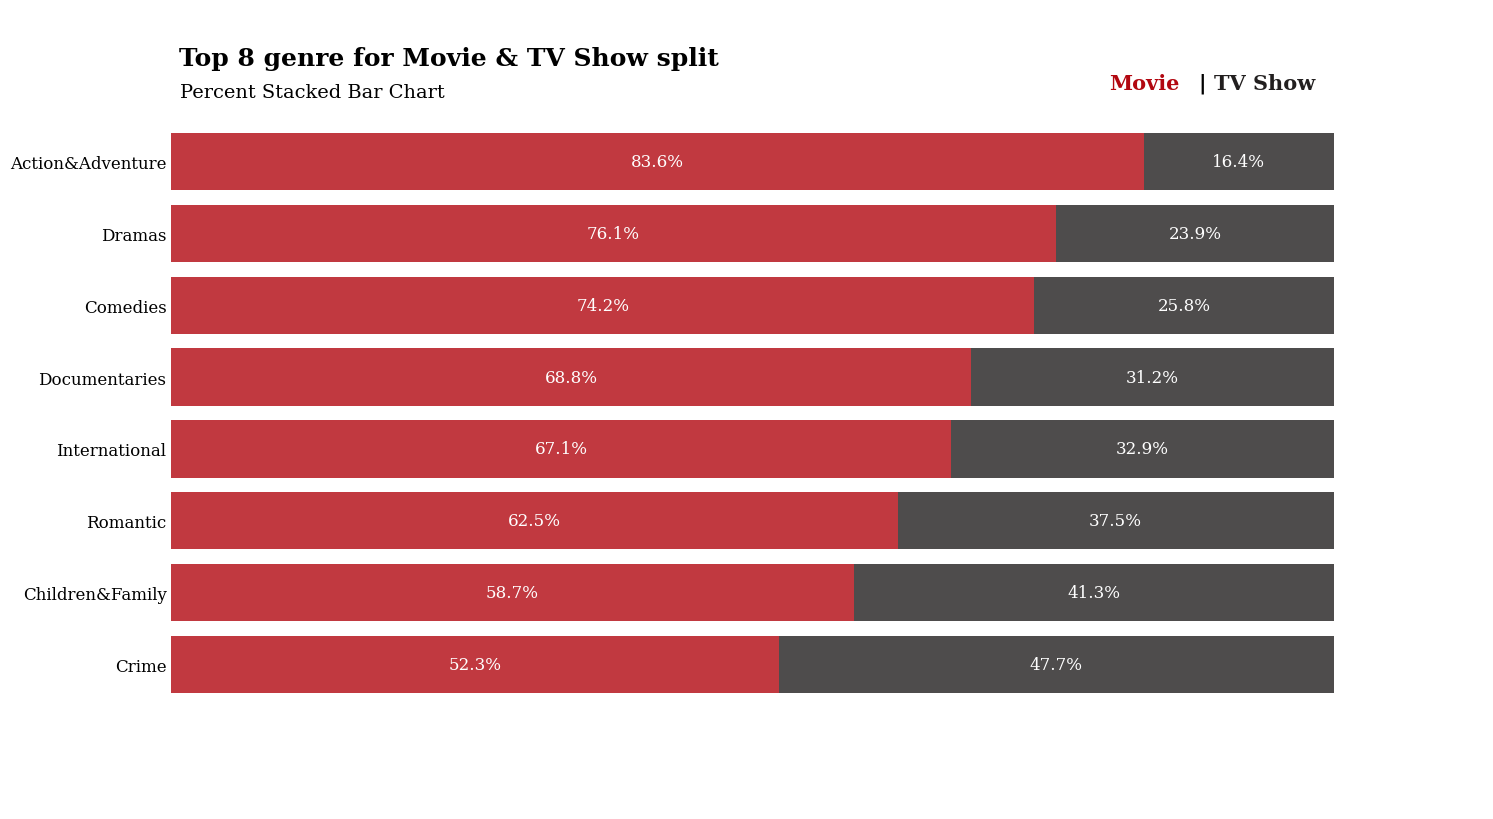

In [161]:
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    

fig.text(0.13, 0.93, 'Top 8 genre for Movie & TV Show split', fontsize=18, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=14,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82, 0.9, "TV Show", fontweight="bold",
         fontfamily='serif', fontsize=15, color='#221f1f')




import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='white',lw=0.2)
fig.lines.extend([l1])




ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)


plt.savefig("fig1.pdf", dpi=400)

In [162]:
#10 paesi con più prodotti

from collections import Counter
df2 = pd.read_csv('netflix_titles.csv')  # reading the csv file
df2=df2.dropna(subset=['country'])

df2['temp'] = df2['country'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').replace(' , ', ',').split(','))
Countries = []
for i in df2['temp']:
    Countries += i
unique_countries = list(set(Countries))
countries_df = pd.DataFrame(unique_countries)
countries_df.columns = ["countries"]
conta = [item[0] for item in Counter(Countries).most_common(10)]
countries_df = pd.DataFrame(conta)
countries_df.columns = ["countries"]
Counter(Countries)

Counter({'United States': 3690,
         'South Africa': 62,
         'India': 1046,
         'Ghana': 5,
         'Burkina Faso': 1,
         'United Kingdom': 806,
         'Germany': 226,
         'Ethiopia': 1,
         'Czech Republic': 22,
         'Mexico': 169,
         'Turkey': 113,
         'Australia': 160,
         'France': 393,
         'Finland': 11,
         'China': 162,
         'Canada': 445,
         'Japan': 318,
         'Nigeria': 103,
         'Spain': 232,
         'Belgium': 90,
         'South Korea': 231,
         'Singapore': 41,
         'Italy': 100,
         'Romania': 14,
         'Argentina': 91,
         'Venezuela': 4,
         'Hong Kong': 105,
         'Russia': 27,
         'Ireland': 46,
         'Nepal': 2,
         'New Zealand': 33,
         'Brazil': 97,
         'Greece': 11,
         'Jordan': 9,
         'Colombia': 52,
         'Switzerland': 19,
         'Israel': 30,
         'Taiwan': 89,
         'Bulgaria': 10,
         'Algeria': 3

In [163]:
# tutti i generi
df2['genre'] = df2['listed_in'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').split(','))
Types = []
for i in df2['genre']:
    Types += i
    
unique_genres = list(set(Types))
# create new df
genres_df = pd.DataFrame(unique_genres)
genres_df.columns = ["genres"]
#genres_df
a=list(countries_df["countries"])
b = list(genres_df["genres"])

In [164]:
tabella= pd.DataFrame(0, columns=range(10),index=range(42))
tabella.columns =a
tabella.index = b
#tabella.loc['Comedies']['United States']+=1
#tabella


def contains_word(s, w):
    a = (' ' + w) in (' ' + s)
    return a

tempo=[]
i2=[]
for tidx, type_ in enumerate(countries_df['countries']):
    for idx, i in enumerate(df2['temp']):
        for word in i:
            if contains_word(type_,word):
                for tidx2, type2_ in enumerate(genres_df['genres']):
                    tempo= df2.iloc[idx]
                    i2 = tempo['genre']
                    for word2 in i2:
                        if contains_word(type2_,word2):
                              tabella.loc[word2][word]+=1
#tabella       

In [165]:
tabella_minimal= pd.DataFrame(0, columns=range(10),index=range(42))
tabella_minimal.columns =a
tabella_minimal.index = b
#tabella.loc['Comedies']['United States']+=1
#tabella
bu=[]
for i in a:
    bu=tabella[i].nlargest(3)
    for j in b:
        for k in bu:
            if tabella.loc[j][i] == k:
                tabella_minimal.loc[j][i]=k
tabella_minimal=tabella_minimal.loc[(tabella_minimal!=0).any(axis=1)]
tabella_minimal


,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
Anime Series,0,0,0,0,0,143,0,0,0,0
Dramas,1670,1324,394,164,334,0,152,0,160,88
Romantic TV Shows,0,0,0,0,0,0,0,77,0,0
Comedies,1360,646,182,188,102,0,94,0,84,48
Korean TV Shows,0,0,0,0,0,0,0,132,0,0
British TV Shows,0,0,225,0,0,0,0,0,0,0
International Movies,0,864,0,0,207,0,140,0,94,70
International TV Shows,0,0,0,0,0,151,0,152,0,0
Action & Adventure,808,0,0,0,0,114,0,0,0,0
Thrillers,0,0,0,98,0,0,0,0,0,0


<AxesSubplot: >

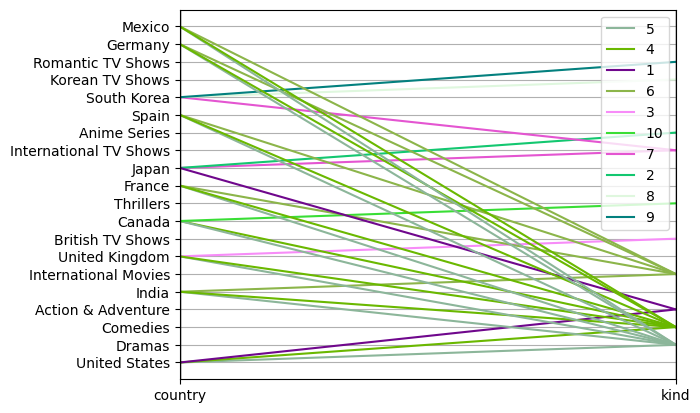

In [297]:
tab= pd.DataFrame(0, columns = ['country', 'dummy', 'kind'],index=range(30))
a2=list(['United States','United States','United States','India','India','India',
         'United Kingdom','United Kingdom','United Kingdom', 
         'Canada','Canada','Canada', 'France','France','France', 'Japan','Japan','Japan',
         'Spain', 'Spain', 'Spain', 'South Korea','South Korea','South Korea',
         'Germany','Germany','Germany', 'Mexico','Mexico','Mexico'])
b2 = list(['Dramas','Comedies','Action & Adventure','Dramas','International Movies','Comedies',
          'Dramas','British TV Shows','Comedies','Comedies','Dramas', 'Thrillers',
          'Dramas', 'International Movies', 'Comedies', 'International TV Shows', 'Anime Series', 'Action & Adventure',
          'Dramas', 'International Movies', 'Comedies', 'International TV Shows', 'Korean TV Shows','Romantic TV Shows',
          'Dramas', 'International Movies', 'Comedies', 'Dramas', 'International Movies', 'Comedies'])
b3=      [5, 4, 1, 5, 6, 4,
          5, 3, 4, 4, 5, 10, 
          5, 6, 4, 7, 2, 1,
          5, 6, 4, 7, 8, 9, 
          5, 6, 4, 5, 6, 4 ]
tab['country']=a2
tab['kind'] = b2
tab['dummy'] =b3
tab
#Action & Adventure 1
#Anime Series 2	
#British TV Shows 3	
#Comedies	4
# Dramas 5
# International Movies	6
# International TV Shows	7
# Korean TV Shows	8
# Romantic TV Shows	9
# Thrillers 10
#print(tab)
pd.plotting.parallel_coordinates(tab, class_column='dummy')

In [176]:
df3 = pd.read_csv('netflix_titles.csv')
df3 = df3[['type','country','release_year']]
df3=df3.dropna(subset=['country'])
df3['temp'] = df3['country'].apply(
    lambda x:  x.replace(' ,', ',').replace(', ', ',').replace(' , ', ',').split(','))
#df3.groupby(by='release_year').apply(lambda x: x)


In [185]:
y= list([str(i).zfill(2) for i in range(1942,2022)])
len(y)
mux = pd.MultiIndex.from_product([a, ['TV','Movie']])
tabella3= pd.DataFrame(0, columns=mux,index=range(80))
tabella3.index = y

for tidx, type_ in enumerate(countries_df['countries']):
    for idx, i in enumerate(df3['temp']):
        for word in i:
            if contains_word(type_,word):
                        if (df2.iloc[idx].type == 'TV Show'):
                            tabella3.loc[str(df3.iloc[idx].release_year)][word,'TV']+=1
                        else: 
                            tabella3.loc[str(df3.iloc[idx].release_year)][word,'Movie']+=1
#tabella3


United States       India       United Kingdom       Canada       France  \
                TV Movie    TV Movie             TV Movie     TV Movie     TV   
1942             0     2     0     0              0     0      0     0      0   
1943             0     3     0     0              0     0      0     0      0   
1944             0     3     0     0              0     1      0     0      0   
1945             1     3     0     0              0     0      0     0      0   
1946             1     1     0     0              0     0      0     0      0   
...            ...   ...   ...   ...            ...   ...    ...   ...    ...   
2017            82   360     3   108             38    63     12    46      9   
2018           140   317    13    88             36    60     18    49     14   
2019           160   268    14    79             28    40     17    27     17   
2020           185   199    17    60             35    33     17    22     13   
2021           107    66    10    25             22    14      8     4      4   

           Japan       Spain       South Korea       Germany       Mexico  \
     Movie    TV Movie    TV Movie          TV Movie      TV Movie     TV   
1942     0     0     0     0     0           0     0       0     0      0   
1943     0     0     0     0     0           0     0       0     0      0   
1944     0     0     0     0     0           0     0       0     0      0   
1945     0     0     0     0     0           0     0       0     0      0   
1946     0     0     0     0     0           0     0       0     0      0   
...    ...   ...   ...   ...   ...         ...   ...     ...   ...    ...   
2017    31    21    16     7    26          23    10       5    17      3   
2018    33    33    16    10    36          20    14       3    11      9   
2019    32    24    12    11    21          20     7       3    11     11   
2020    13    15     9    14    17          26     5      19    14     12   
2021     9    12     3    10     6          14     6       5     4      8   

            
     Movie  
1942     0  
1943     0  
1944     0  
1945     0  
1946     0  
...    ...  
2017    17  
2018    16  
2019    14  
2020    11  
2021     5  

[80 rows x 20 columns]

Text(0.5, 1.0, 'Mexico')

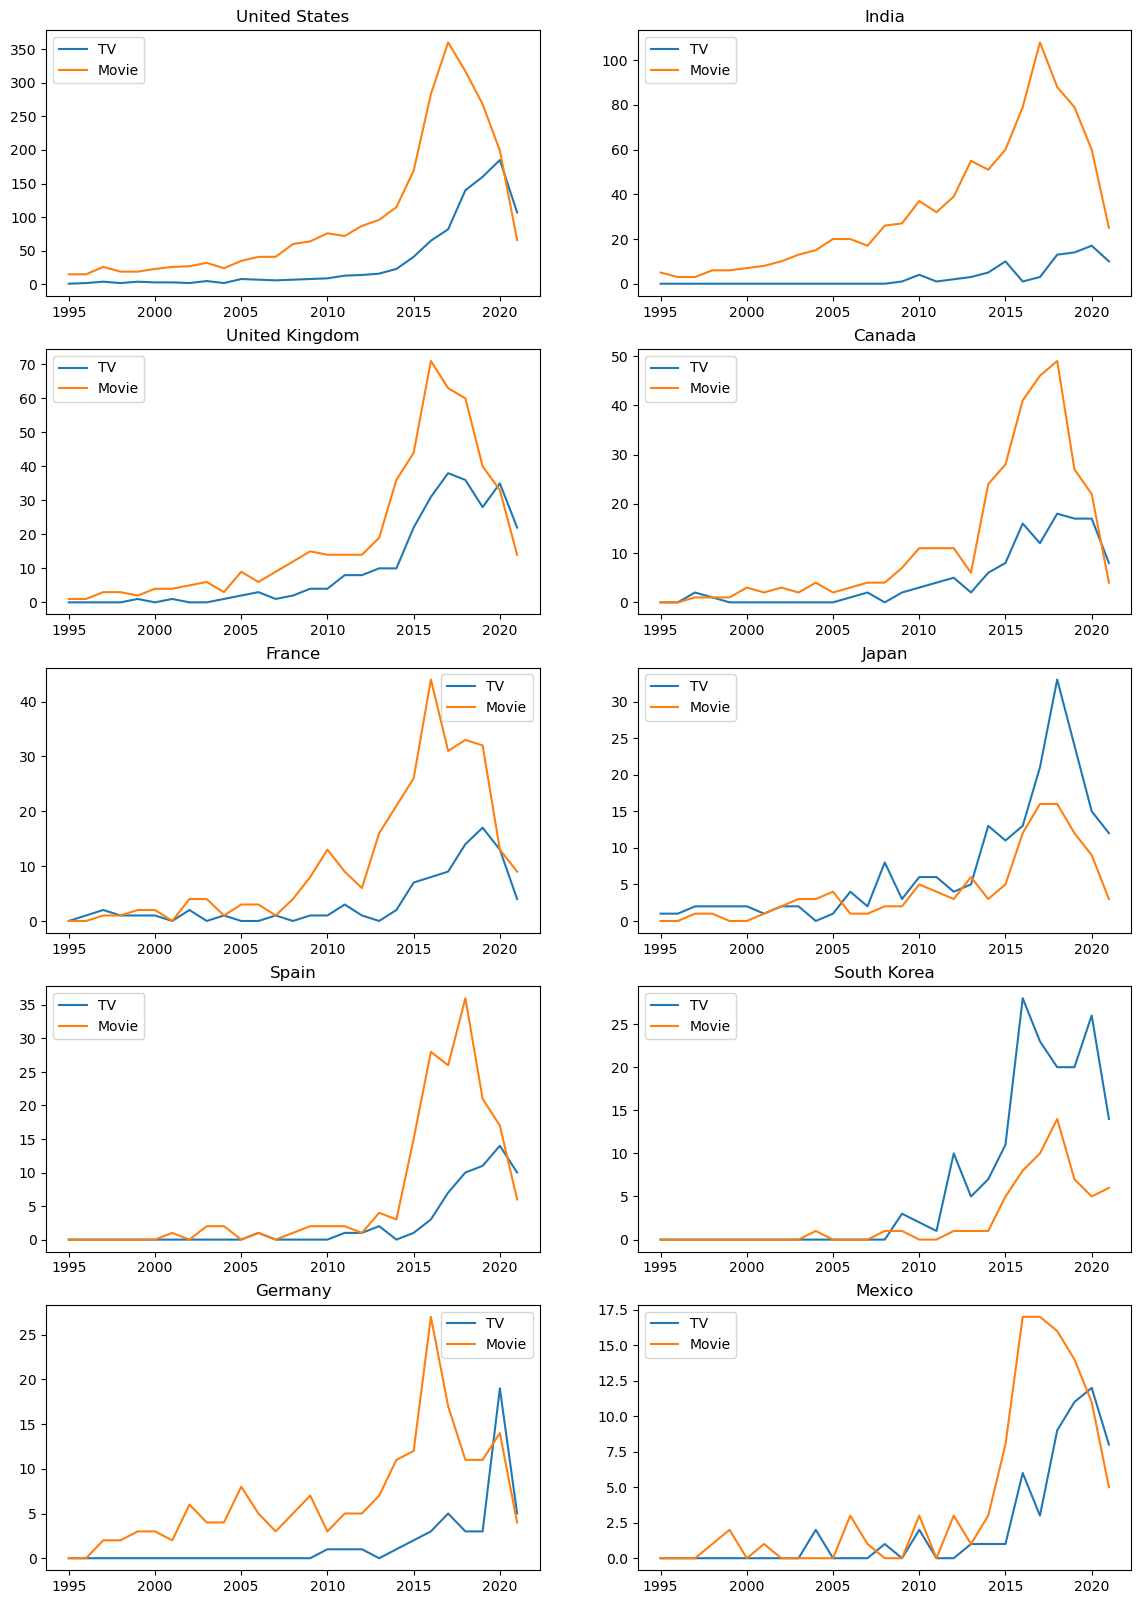

In [234]:
tabella4=tabella3[tabella3['year'] > '1994']
fig, axes = plt.subplots(nrows=5, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(14)
tabella4.plot(ax=axes[0,0], y= 'United States'); axes[0,0].set_title('United States')
tabella4.plot(ax=axes[0,1], y= 'India'); axes[0,1].set_title('India')
tabella4.plot(ax=axes[1,0], y= 'United Kingdom'); axes[1,0].set_title('United Kingdom')
tabella4.plot(ax=axes[1,1], y= 'Canada'); axes[1,1].set_title('Canada')
tabella4.plot(ax=axes[2,0], y= 'France'); axes[2,0].set_title('France')
tabella4.plot(ax=axes[2,1], y= 'Japan'); axes[2,1].set_title('Japan')
tabella4.plot(ax=axes[3,0], y= 'Spain'); axes[3,0].set_title('Spain')
tabella4.plot(ax=axes[3,1], y= 'South Korea'); axes[3,1].set_title('South Korea')
tabella4.plot(ax=axes[4,0], y= 'Germany'); axes[4,0].set_title('Germany')
tabella4.plot(ax=axes[4,1], y= 'Mexico'); axes[4,1].set_title('Mexico')

United States       India       United Kingdom       Canada       France  \
                TV Movie    TV Movie             TV Movie     TV Movie     TV   
1986             1     8     0     2              0     2      0     0      0   
1987             0     7     0     1              0     0      0     0      0   
1988             2    12     0     2              0     0      0     0      0   
1989             1     9     0     2              0     2      1     0      0   
1990             3    11     0     4              0     1      0     0      0   
1991             0    11     0     1              0     2      0     0      0   
1992             2    11     0     1              1     5      0     0      0   
1993             4    15     0     4              1     3      1     0      0   
1994             1    10     0     5              0     3      0     0      0   
1995             1    15     0     5              0     1      0     0      0   
1996             2    15     0     3              0     1      0     0      1   
1997             4    26     0     3              0     3      2     1      2   
1998             2    19     0     6              0     3      1     1      1   
1999             4    19     0     6              1     2      0     1      1   
2000             3    23     0     7              0     4      0     3      1   
2001             3    26     0     8              1     4      0     2      0   
2002             2    27     0    10              0     5      0     3      2   
2003             5    32     0    13              0     6      0     2      0   
2004             2    24     0    15              1     3      0     4      1   
2005             8    35     0    20              2     9      0     2      0   
2006             7    41     0    20              3     6      1     3      0   
2007             6    41     0    17              1     9      2     4      1   
2008             7    60     0    26              2    12      0     4      0   
2009             8    64     1    27              4    15      2     7      1   
2010             9    76     4    37              4    14      3    11      1   
2011            13    72     1    32              8    14      4    11      3   
2012            14    87     2    39              8    14      5    11      1   
2013            16    96     3    55             10    19      2     6      0   
2014            23   115     5    51             10    36      6    24      2   
2015            41   169    10    60             22    44      8    28      7   
2016            65   283     1    79             31    71     16    41      8   
2017            82   360     3   108             38    63     12    46      9   
2018           140   317    13    88             36    60     18    49     14   
2019           160   268    14    79             28    40     17    27     17   
2020           185   199    17    60             35    33     17    22     13   
2021           107    66    10    25             22    14      8     4      4   

            ... Japan Spain       South Korea       Germany       Mexico  \
     Movie  ... Movie    TV Movie          TV Movie      TV Movie     TV   
1986     0  ...     0     0     0           0     0       0     0      0   
1987     0  ...     0     0     0           0     0       0     0      0   
1988     0  ...     0     0     0           0     0       0     0      0   
1989     2  ...     0     0     0           0     0       0     0      0   
1990     0  ...     0     0     0           0     0       0     0      0   
1991     1  ...     0     0     0           0     0       0     0      0   
1992     2  ...     2     0     0           0     0       0     0      0   
1993     4  ...     1     0     1           0     0       0     1      0   
1994     2  ...     0     0     0           0     0       0     0      0   
1995     0  ...     0     0     0           0     0       0     0      0   
1996     0  ..